# Plot evolution of thresholds during test

Even if we are primarily interested in fully conditioned thresholds for repetability, it is interesting to see how the thresholds evolve during the test.

Generic libraries:

In [1]:
from functools import partial
from pathlib import Path
import tomllib

import numpy as np

MULTIPAC testbench imports:

In [2]:
from multipac_testbench.multipactor_test import MultipactorTest
import multipac_testbench.instruments as ins
from multipac_testbench.util.post_treaters import running_mean
from multipac_testbench.util.multipactor_detectors import \
    quantity_is_above_threshold

Set up project:

In [3]:
project = Path("../data/campaign_one_probe/")
config_path = Path(project, "testbench_configuration.toml")

with open(config_path, "rb") as f:
    config = tomllib.load(f)

Load the files:

In [4]:
frequencies = (120., 160.)
swrs = (1., 1.)
filepath = Path(project, "120MHz_travelling.csv")
multipactor_test = MultipactorTest(
    filepath,
    freq_mhz=120.,
    swr=1.,
    config=config,
    sep='\t')

Smooth the current:

In [5]:
current_smoother = partial(
    running_mean,
    n_mean=10,
    mode='same',
)

multipactor_test.add_post_treater(
    current_smoother,
    ins.CurrentProbe,
)

Detect multipactor:

In [6]:
current_multipactor_criterions = {'threshold': 16.,
                                  'consecutive_criterion': 10,
                                  'minimum_number_of_points': 5}
current_multipac_detector = partial(quantity_is_above_threshold,
                                    **current_multipactor_criterions)
power_is_growing_kw = {'n_trailing_points_to_check': 70}
current_multipactor_bands = multipactor_test.detect_multipactor(
    current_multipac_detector,
    ins.CurrentProbe,
    power_is_growing_kw=power_is_growing_kw,
)

In [7]:
figsize = (8, 8)

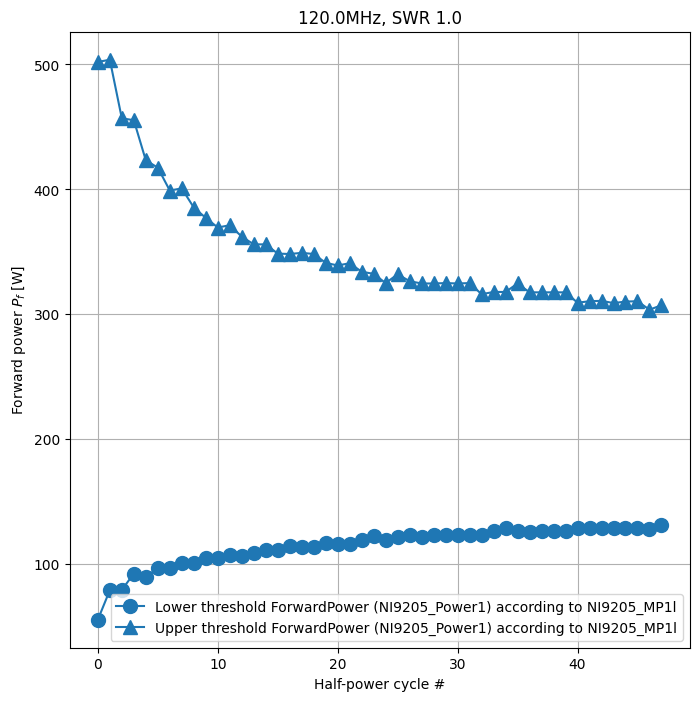

In [8]:
axes, _ = multipactor_test.plot_thresholds(ins.ForwardPower,
                                           current_multipactor_bands,
                                           figsize=figsize)